In [1]:
import pandas as pd
df = pd.read_csv('D:\\FF\\data\\routeScoreFinal.csv',names=['s1','s2','score','dist'])
print(df.shape)
print(df.head())
dfp = pd.read_csv('D:\\FF\\data\\teF.csv')
print(dfp.shape)
print(dfp.head())
new_df = pd.merge(dfp, df,  how='left', left_on=['s1','s2'], right_on = ['s1','s2'])
print(new_df.shape)
print(new_df.head(20))

(843, 4)
    s1   s2  score  dist
0  538  537    0.0   125
1  137  136    0.0   213
2  260  259    0.0   200
3  623  532    0.0   125
4  558  222    0.0   100
(237973, 8)
   s1  s2     distc     pearc     speac        te  direction   timestamp
0   6   5  0.245330  0.754670  0.808405  0.127175          1  01/01/2017
1   6   5  0.086547  0.913453  0.939917  0.107228          2  02/01/2017
2   6   5  0.037344  0.962656  0.963367  0.104841          2  03/01/2017
3   6   5  0.041158  0.958842  0.955418  0.000000          0  04/01/2017
4   6   5  0.037523  0.962477  0.962141  0.097281          2  05/01/2017
(237973, 10)
    s1  s2     distc     pearc     speac        te  direction   timestamp  \
0    6   5  0.245330  0.754670  0.808405  0.127175          1  01/01/2017   
1    6   5  0.086547  0.913453  0.939917  0.107228          2  02/01/2017   
2    6   5  0.037344  0.962656  0.963367  0.104841          2  03/01/2017   
3    6   5  0.041158  0.958842  0.955418  0.000000          0  04/01/2

In [2]:
df = pd.read_csv('D:\\FF\\data\\teF.csv')
#df.sort_values(by=['timestamp'],ascending=True)
df['uindex']=df['s1'].astype(str)+"_"+df['s2'].astype(str)
#str(df['s1'])#+'-'+str(df['s2'])
print(df.shape)
df['timestamp'] = pd.to_datetime(df['timestamp'],format="%d/%m/%Y")
df['timestamp'] = [time.date() for time in df['timestamp']]
tdf = df[df['uindex']=='125_98']
idx = pd.DatetimeIndex(tdf.timestamp)
series = pd.Series(tdf.direction.values,index=idx)

print(series.head())

(237973, 9)
timestamp
2017-01-01    2
2017-01-02    1
2017-01-03    1
2017-01-04    1
2017-01-05    0
dtype: int64


In [3]:
uvalues = df['uindex'].unique().tolist()

In [4]:
ff = pd.DataFrame({'uindex':[],'timestamp':[],'direction':[]})
for row in uvalues:
    #print(row)
    tdf = df[df['uindex']==row]
    idx = pd.DatetimeIndex(tdf.timestamp)
    series = pd.Series(tdf.direction.values,index=idx)
    a=series.resample('D').mean()
    a = a.reset_index(name='direction')
    ndf = pd.DataFrame(data=a)
    ndf['uindex']=row
    ff=ff.append(ndf)
print(ff.tail())

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


     direction  timestamp   uindex
344        2.0 2017-12-27  670_249
345        0.0 2017-12-28  670_249
346        0.0 2017-12-29  670_249
347        2.0 2017-12-30  670_249
348        2.0 2017-12-31  670_249


In [30]:
p = ff.pivot_table(index='uindex',columns='timestamp',values='direction',fill_value=-1)
p.iloc[1:2,0:5]

timestamp
2017-01-01   -1
2017-01-02    2
2017-01-03    2
2017-01-04    1
2017-01-05    2
Name: 207_191, dtype: int64

In [36]:
len(p[p.index.isin(df2.index)].iloc[89,:])


365

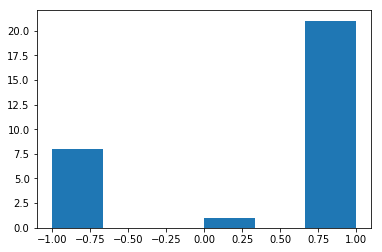

In [26]:
t = p[p.index.isin(df2.index)].iloc[0:1,60:90]
t.shape
_ = plt.hist(t, bins='auto')

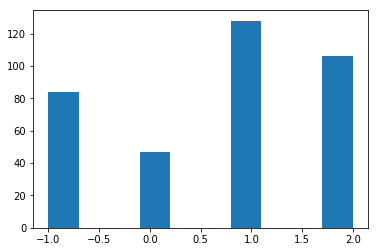

In [20]:
_ = plt.hist(t, bins='auto')

1


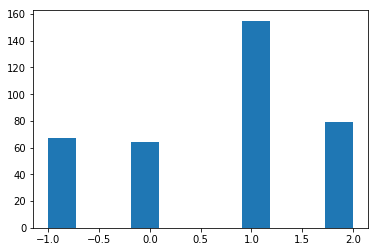

In [15]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statistics as s
x = p.iloc[0:3,0:].values
print(s.mode(x[0]))

_ = plt.hist(x[0], bins='auto')

In [ ]:
import statistics as s
from collections import Counter
count=0
for i in range(0,832):
    try:
        x = p.iloc[i:i+1,0:].values
        m = s.mode(x[0])
        if m==-1:
            count=count+1
            print(p.iloc[i:i+1].index.values[0])
    except:
        #print(p.iloc[i:i+1].index.values[0])
        print("")
print(count)

In [217]:
import collections as c
nlst = []

dirTest='D:\\FF\\data\\'

for i in range(0,832):
    nlstm = []
    x = p.iloc[i:i+1,0:].values
    l = len(x[0])
    mone = (c.Counter((x[0]))[-1]*100)/l
    zero = (c.Counter((x[0]))[0]*100)/l
    one = (c.Counter((x[0]))[1]*100)/l
    two = (c.Counter((x[0]))[2]*100)/l
    nlstm.append([mone,zero,one,two])
    r = nlstm[0].index(max(nlstm[0]))
    trend=1
    for j in (0,3):
        if nlstm[0][r]-nlstm[0][j] < 10 and r!=j:
            trend = 0
            r =-1
    nlst.append([p.iloc[i:i+1].index.values[0],mone,zero,one,two,trend,r])
    #print(nlst)
ndf = pd.DataFrame(nlst)
ndf.to_csv(dirTest+'dirPerc.csv')

In [212]:
nlstm = []
x = p.iloc[83:84,0:].values
l = len(x[0])
mone = (c.Counter((x[0]))[-1]*100)/l
zero = (c.Counter((x[0]))[0]*100)/l
one = (c.Counter((x[0]))[1]*100)/l
two = (c.Counter((x[0]))[2]*100)/l
nlstm.append([mone,zero,one,two])
r =   nlstm[0].index(max(nlstm[0]))
print(r)
for j in (0,3):
    if nlstm[0][r]-nlstm[0][j] < 10 and r!=j:
        print(nlstm[0][r],nlstm[0][j])

2
52.602739726027394 44.10958904109589


In [188]:
print(nlst[0].index(max(nlst[0])))

3


In [2]:
import pandas as pd
df = pd.read_csv('D:\\FF\\data\\routeScoreFinal2.csv',index_col='location')
print(df.index[0])

475_195


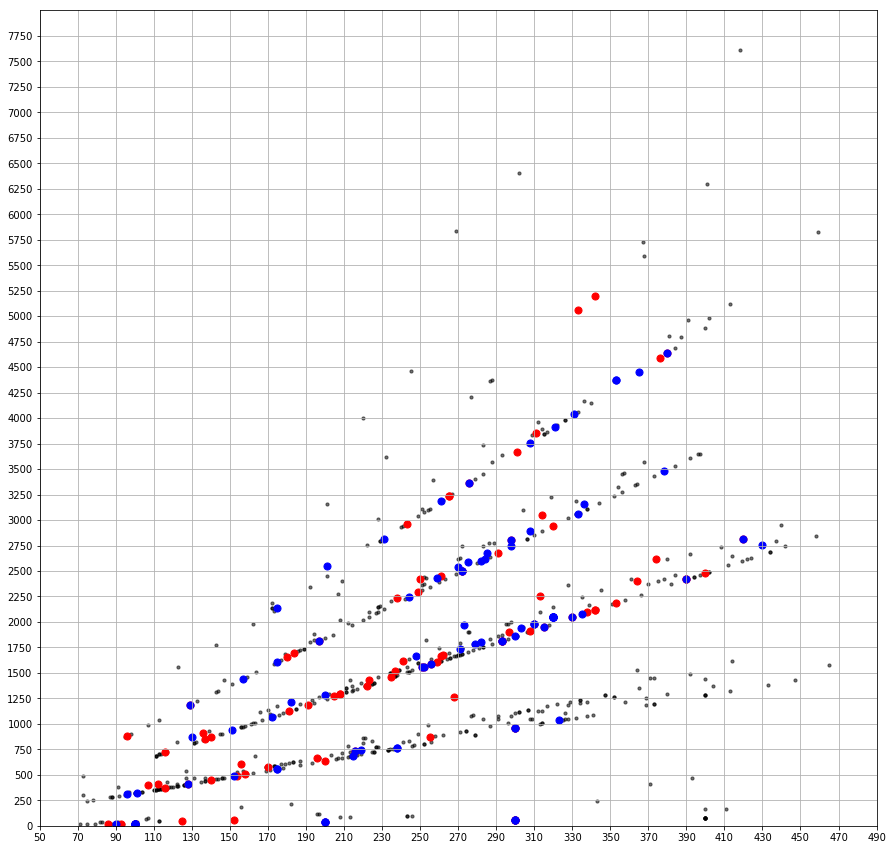

In [43]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,15))
plt.scatter(df['dist'],df['score'],facecolors='black',alpha=.55, s=10)
plt.scatter(df[df.index.isin(df1.index)]['dist'], df[df.index.isin(df1.index)]['score'], color="red",s=50)
plt.scatter(df[df.index.isin(df2.index)]['dist'], df[df.index.isin(df2.index)]['score'], color="blue",s=50)
plt.axis([50,475,0,8000])
plt.xticks(np.arange(50, 500, step=20))
plt.yticks(np.arange(0, 8000, step=250))
axes = plt.gca()
axes.grid()
plt.show()

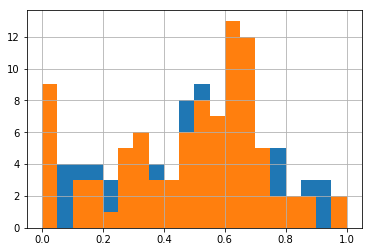

In [36]:
dfone = df[df.index.isin(df1.index)]['dist']
dftwo = df[df.index.isin(df2.index)]['dist']
dfmax =  max(df['dist'])
dfmin =  min(df['dist'])
df1max =  max(dfone)
df1min =  min(dfone)
df2max =  max(dftwo)
df2min =  min(dftwo)
a = (df['dist']-dfmin) / (dfmax - dfmin)

b = (dfone-df1min) / (df1max - df1min)
c = (dftwo-df2min) / (df2max - df2min)
#hist = a.hist(bins=20)
hist = b.hist(bins=20)
hist = c.hist(bins=20)
#hist = df[df.index.isin(df2.index)]['dist'].hist(bins=20)
#hist = df[df.index.isin(df1.index)]['dist'].hist(bins=20)

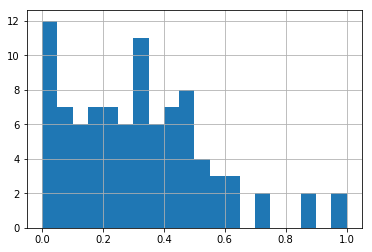

In [54]:
dfone = df[df.index.isin(df1.index)]['score']
dftwo = df[df.index.isin(df2.index)]['score']
dfmax =  max(df['score'])
dfmin =  min(df['score'])
df1max =  max(dfone)
df1min =  min(dfone)
df2max =  max(dftwo)
df2min =  min(dftwo)
a = (df['score']-dfmin) / (dfmax - dfmin)

b = (dfone-df1min) / (df1max - df1min)
c = (dftwo-df2min) / (df2max - df2min)
#hist = a.hist(bins=20)
hist = b.hist(bins=20)
#hist = c.hist(bins=20)
#hist = df[df.index.isin(df2.index)]['dist'].hist(bins=20)
#hist = df[df.index.isin(df1.index)]['dist'].hist(bins=20)

0.17696267294951326
0.31514682113746223
0.3801116142881354


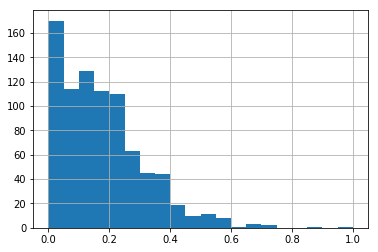

In [45]:
import numpy as np
hist = a.hist(bins=20)
print(np.mean(a))
print(np.mean(b))
print(np.mean(c))

In [6]:
df1 = pd.read_csv('D:\\FF\\data\\nodirection.csv',index_col='location')
df2 = pd.read_csv('D:\\FF\\data\\noTE.csv',index_col='location')
#print(df[df.index.isin(df2.index)]['dist'])

In [277]:
print(df1.shape)
print(df2.shape)

(93, 4)
(92, 1)


In [305]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit_predict(df)

In [303]:
kmeans

array([2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 4, 0, 5, 1, 0, 2, 0, 4, 5, 0,
       0, 0, 4, 0, 1, 0, 2, 4, 1, 4, 1, 4, 1, 1, 1, 0, 5, 3, 2, 4, 4, 4,
       2, 2, 2, 4, 0, 0, 2, 5, 0, 0, 0, 2, 2, 3, 1, 2, 0, 0, 2, 2, 0, 1,
       2, 4, 4, 0, 0, 2, 4, 0, 4, 0, 2, 0, 0, 4, 0, 2, 0, 4, 4, 2, 2, 5,
       2, 2, 1, 0, 0, 1, 4, 4, 2, 1, 4, 0, 2, 2, 5, 2, 1, 1, 0, 4, 2, 0,
       0, 0, 1, 0, 2, 0, 1, 5, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 0, 2, 0, 2,
       4, 1, 3, 2, 4, 0, 4, 4, 2, 2, 2, 4, 2, 0, 2, 0, 0, 0, 0, 0, 4, 4,
       0, 5, 0, 4, 2, 3, 4, 4, 4, 4, 0, 0, 1, 4, 2, 1, 0, 0, 1, 0, 4, 0,
       4, 0, 1, 1, 0, 0, 0, 0, 4, 5, 2, 1, 5, 0, 0, 2, 0, 4, 0, 2, 4, 0,
       0, 0, 4, 4, 1, 0, 4, 2, 1, 4, 2, 4, 4, 4, 0, 4, 2, 0, 4, 0, 2, 2,
       1, 2, 1, 1, 5, 0, 0, 4, 3, 1, 4, 1, 2, 0, 2, 4, 1, 2, 1, 1, 2, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 1, 4, 2, 5, 4, 0, 2, 0,
       5, 2, 2, 1, 4, 0, 0, 4, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 4, 4, 4,
       0, 1, 2, 2, 4, 0, 2, 2, 0, 0, 0, 4, 2, 0, 2,

In [2]:
import json
outfile = 'D:/FF/FFmaster/FF-master/data/odLondon/list_'
for i in range(2,13):
    filename = 'E02000001_'+str(i)+'.json'
    #filename = 'E02000001.json'
    outfile=outfile+filename[:-5]+'.csv'
    print(filename)
    f = open(outfile,"w+")
    result = ''
    with open('D:/FF/FFmaster/FF-master/data/odLondon/'+filename) as json_file:
        data = json.load(json_file)
        for p in data['rows']:
            for r in p['elements']:
                try:
                    tokens = r['duration']['text'].split()
                    #print(tokens)
                    if len(tokens)>2:
                        mins = int(tokens[0])*60+int(tokens[2])
                    else:
                        mins = int(tokens[0])
                    result = r['distance']['text']+','+ str(mins)
                    #print(result)
                    '''if len(r['duration']['text'])>7:
                            mins = int(r['duration']['text'][:-12])*60
                            #print(r['distance']['text'],'-',mins)
                            result = r['distance']['text']+','+ str(mins)
                            print(result)
                    else:
                            print(r['distance']['text']+','+r['duration']['text'][:-4])
                            result = r['distance']['text']+','+r['duration']['text'][:-4]'''
                        #f.write("%s\n" % result)
                except:
                    result = 'Error'
                f.write("%s\n" % result)        
    f.close()
    outfile = 'D:/FF/FFmaster/FF-master/data/odLondon/list_'

E02000001_2.json
E02000001_3.json
E02000001_4.json
E02000001_5.json
E02000001_6.json
E02000001_7.json
E02000001_8.json
E02000001_9.json
E02000001_10.json
E02000001_11.json
E02000001_12.json


In [1]:
from geopy.geocoders import Nominatim
import json

In [28]:
path='/Users/casa/FF/data/odLondon/'
locator = Nominatim(user_agent='myGeocoder')
str1 = 'IG11 9HD'.rstrip()
location = locator.geocode(str)
#print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))
outfile = path+'coordsE01_12.csv'
f = open(outfile,"w+")
result=''
with open(path+'E02000001_12.json') as json_file:
    data = json.load(json_file)
    for p in data['destination_addresses']:
        #str1 = p[len(p)-12:len(p)-4].rstrip()
        tokens = p.split()
        print(tokens)
        place = tokens[len(tokens)-3].strip(',')+' '+tokens[len(tokens)-2].strip(',')
        #print(place)
        try:
            location = locator.geocode(place)
            result = str(location.latitude)+','+str(location.longitude)
        except:
            #print(tokens[len(tokens)-3].strip(','),tokens[len(tokens)-2].strip(','))
            result = 'Error'
        #print(result)
        f.write("%s\n" % result)
        
f.close()
        #print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

['68', 'Crooms', 'Hill,', 'Greenwich,', 'London', 'SE10', '8HG,', 'UK']
['8', 'Woolwich', 'Rd,', 'Greenwich,', 'London', 'SE10', '0SA,', 'UK']
['Millennium', 'Village', 'School,', '50', 'John', 'Harrison', 'Way,', 'Greenwich,', 'London', 'SE10', '0BG,', 'UK']
['Harmony', 'Place,', '11', 'Harmony', 'Pl,', 'Greenwich,', 'London', 'SE8', '3FE,', 'UK']
['123', 'Lyme', 'Farm', 'Rd,', 'London', 'SE12', '8JH,', 'UK']
['9', 'Woodford', 'Bridge', 'Rd,', 'Ilford', 'IG4', '5LL,', 'UK']
['79', 'St', "Andrew's", 'Rd,', 'Ilford', 'IG1', '3PE,', 'UK']
['New', 'Springfield', 'Hotel,', '188', 'Upper', 'Clapton', 'Rd,', 'Clapton,', 'London', 'E5', '9DH,', 'UK']
['49', 'Mundford', 'Rd,', 'Clapton,', 'London', 'E5', '9PP,', 'UK']
['79', 'Kingshill', 'Ave,', 'Harrow', 'HA3', '8LA,', 'UK']
['35', 'Mackenzie', 'Walk,', 'Canary', 'Wharf,', 'London', 'E14', '4PH,', 'UK']
['Alexander', 'House,', 'Tiller', 'Rd,', 'Isle', 'of', 'Dogs,', 'London', 'E14', '8PT,', 'UK']
['12', 'Onslow', 'Ave,', 'Sutton', 'SM2', '7ED

In [47]:
import pandas as pd
path='/Users/casa/FF/'
df = pd.read_csv(path+'msoaLondonCentroids.csv')
print(df.head())
print('----')
df = pd.read_csv(path+'msoaLondonCentroids.csv',skiprows=2)
print(df.head())


51.51482 -0.09212999999999999


In [ ]:
import os
path='/Users/casa/2020/bikes/'
#df = pd.read_csv(path+'msoaLondonCentroids.csv',skiprows=10,names=['MSOA11CD','MSOA11NM','ycoord','xcoord'],index_col='MSOA11CD')
df = pd.read_csv(path+'CentroidesDistritosCoord_1.csv',index_col='Name')
for index,row in df.iterrows():
    #print(index)
    ctr='cat '+path+'private/'+str(index).replace(" ","")+'/*.csv >'+ path+'private/'+str(index).replace(" ","")+'/final.csv'
    #print(path+str(index))
    print(ctr)
    #os.mkdir(path+str(index).replace(" ",""))
    os.system(ctr)

In [208]:
ndfd = pd.DataFrame()
ndft = pd.DataFrame()
#df = pd.read_csv(path+'msoaLondonCentroids.csv',names=['MSOA11CD','MSOA11NM','ycoord','xcoord'],index_col='MSOA11CD',skiprows=2)
df = pd.read_csv(path+'CentroidesDistritosCoord_1.csv',index_col='Name')
path=path+'private/'
for index,row in df.iterrows():
    print(path+str(index).replace(" ",""))
    df1 = pd.read_csv(path+str(index).replace(" ","")+'/final.csv',index_col=None,names=['dist','time'])
    ndfd[str(index)]=df1['dist']
    ndft[str(index)]=df1['time']
    #li.append(df1)
#ndf = pd.concat(li, axis=0, ignore_index=True)

/Users/casa/2020/bikes/private/CentroHist√≥rico
/Users/casa/2020/bikes/private/Buenavista-Reforma
/Users/casa/2020/bikes/private/Tlatelolco
/Users/casa/2020/bikes/private/Morelos
/Users/casa/2020/bikes/private/Moctezuma,TerminaldeAutobusesdeOriente(TAPO)


FileNotFoundError: [Errno 2] File b'/Users/casa/2020/bikes/private/Moctezuma,TerminaldeAutobusesdeOriente(TAPO)/final.csv' does not exist: b'/Users/casa/2020/bikes/private/Moctezuma,TerminaldeAutobusesdeOriente(TAPO)/final.csv'

In [81]:
ndft.to_csv(path+'londonTime.csv')
ndfd.to_csv(path+'londonDistance.csv')

In [5]:
gcoords = df['ycoord'].astype(str) + ',' +df['xcoord'].astype(str)
#f.write("%s\n" % gcoords)
s='%7C'.join(gcoords)
indexp = [i for i, ltr in enumerate(s) if ltr == '%']

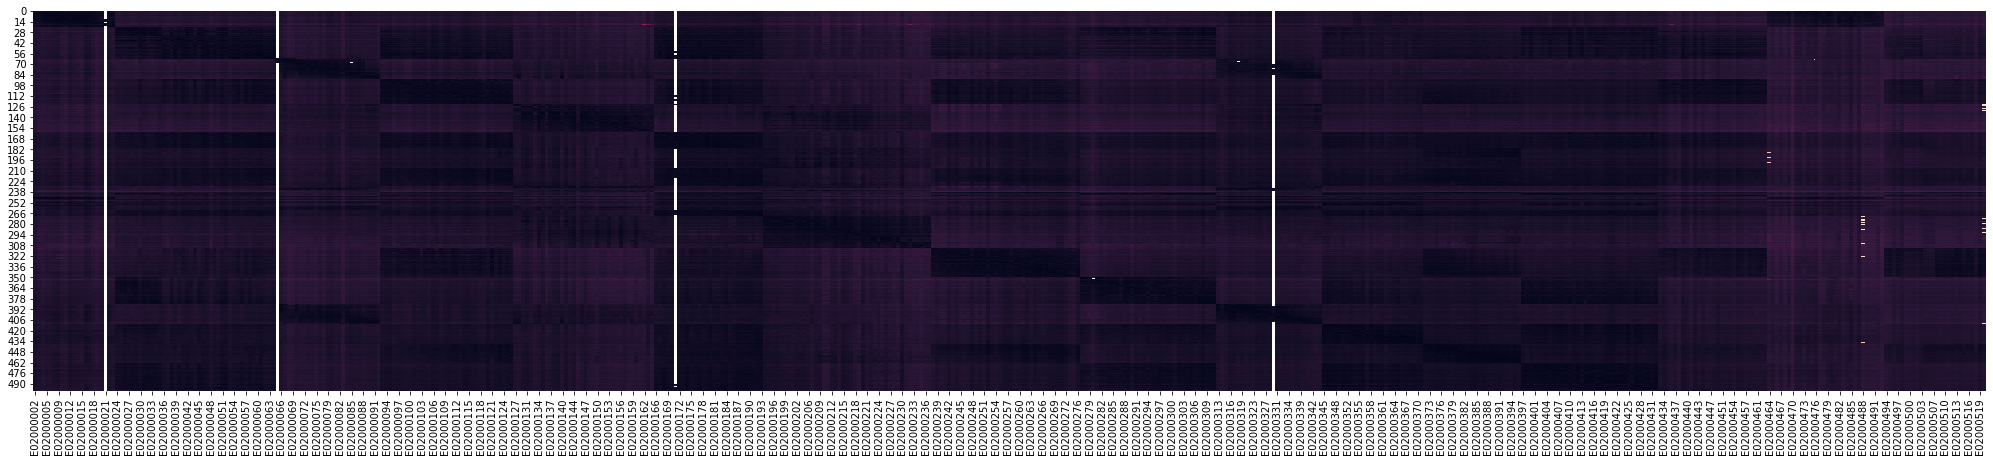

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plts
plt.rcParams['figure.figsize']=(35,7)
plt.rcParams["axes.labelsize"] = 20
ax=sns.heatmap(ndft.iloc[:500,:500],cbar=False)
plt.show()

In [209]:
import pandas as pd
path='/Users/casa/FF/'

In [234]:
df = pd.read_csv(path+'dirTrends.csv',index_col='location')
df1 = pd.read_csv(path+'cluster_memberships.csv',index_col='Location')

In [265]:
#dfc=df1[df1.index.isin(df.s1) & df1.index.isin(df.s2)]
result_df.head()

s1   s2       oneT       twoT     threeT      fourT  hasdir  \
location                                                                 
537_242   537  242  32.054795  12.876712  16.164384  38.904110       0   
564_258   564  258   7.671233  18.082192  40.000000  34.246575       0   
242_241   242  241  32.328767  16.712329  27.123288  23.835616       0   
261_257   261  257  39.452055   8.493151  40.273973  11.780822       0   
273_271   273  271  30.684932  15.890411  21.095890  32.328767       0   

          posMax  MonthuClust  SatClust  SunClust        fclass     id  freq  
location                                                                      
537_242       -1          6.0       2.0       3.0       footway  537.0   5.0  
564_258       -1          3.0       2.0       2.0  unclassified  564.0   9.0  
242_241       -1          6.0       2.0       3.0       footway  242.0   5.0  
261_257       -1          3.0       1.0       1.0  unclassified  261.0   9.0  
273_271       -1          3.0       2.0       3.0    pedestrian  273.0   5.0

In [ ]:
result_df=df.join(df1, on='s1',sort='location').dropna()
result_df=result_df.drop_duplicates(subset=['id'], keep='first').sort_values(['posMax'])
#result_df['MonthuClust'].hist(figsize=(5,5))
result_df.plot.scatter(x='MonthuClust',
                      y='posMax',
                      c='DarkBlue',figsize=(5,5))

In [ ]:
result_df[result_df['posMax']==3][['MonthuClust']].sort_values(['MonthuClust'])#.hist(figsize=(6,6))

In [ ]:
df[df.s1.isin(tdf.index)]['posMax'].to_csv(path+'trendCluster.csv')

In [ ]:
df['incs1']=df1[df1.index.isin(df.s1)]['MonthuClust']
print(df)